# M4_3_1 Perceptron classification

This document is based on the power presentation titled "6. Neural Networks".

The Perceptron classification is an online learning algorithm, is based on a biological neuron. In the artificial neuron, the inputs are connected as dendrites with synaptic weights. And the Axon will be the output that will classify according the weights and the inputs (see next figures).

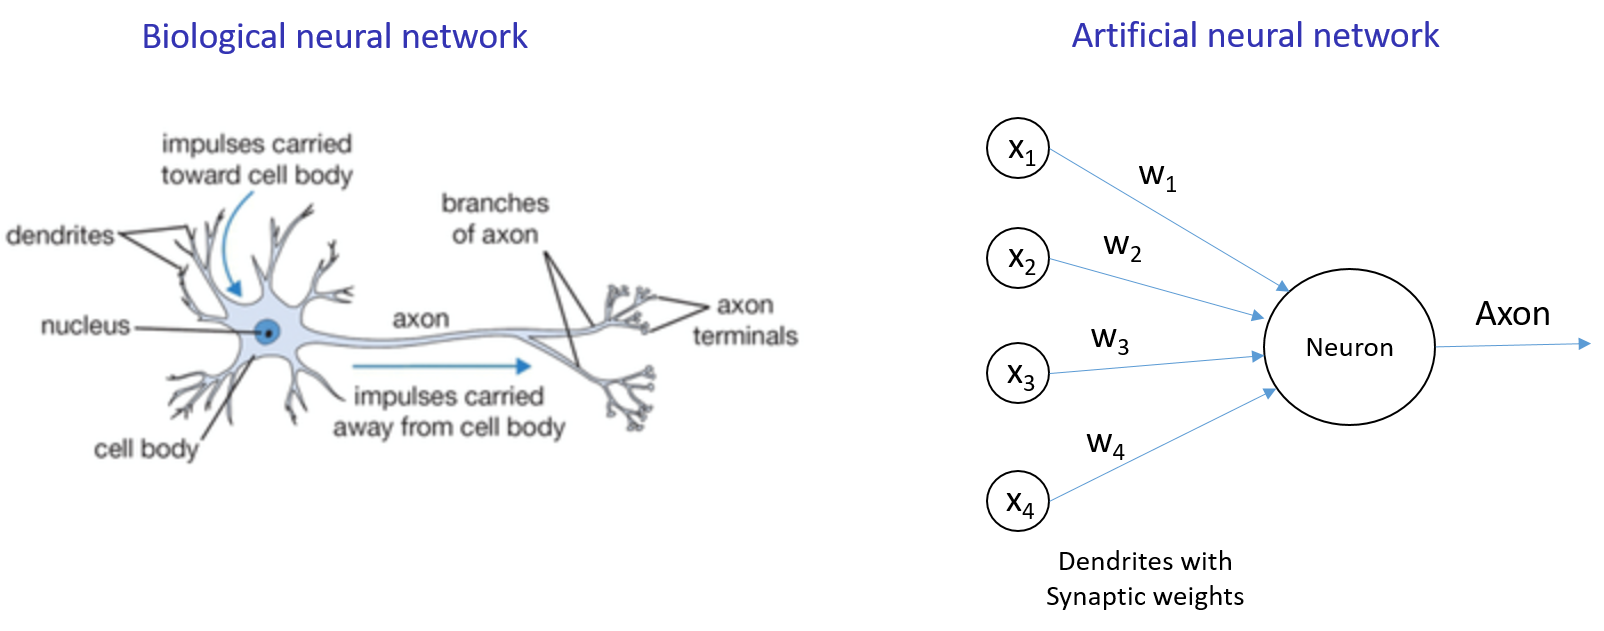

The perceptron model is composed by the inputs (or features), and an output, which is represented by an activation function $h(x^T w)$. This function will classify the output as 1 or 0 according the result of the dot product $x^T w$:

$$y = 1 \; \; \;if \; \; \;x^T w \geq 0$$

$$y = 0 \; \; \;if \; \; \;x^T w < 0 $$

The perceptron model will upgrade the w values according three simple rules:

1. If $y=1$ and $\bar{y}=0$, then $w = w + x$
2. If $y=0$ and $\bar{y}=1$, then $w = w - x$
2. If $y=\bar{y}$, then $w = w$

In one single expression: $w = w + ex$, where $e = (y - \bar{y})$. And for bias: $b = b + e$.


## Iris Dataset

We will use the Iris dataset to implement the perceptron algorithm. This dataset is located in the library sklearn, and must be imported to use it.

The data contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2.

The atribute information is:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - setosa
    - versicolor
    - virginica

For the purpose of the perceptron classification we will use only 2 classes instead of 3. 

## Perceptron Algorithm

1. Import libraries
2. Load Iris dataset and change classes.
3. Plot the data using only two features: sepal length, sepal width.
4. Code the Activation Function
5. Implement the perceptron
6. Plot the decision boundary.

In [1]:
#1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#2. Loading Iris dataset
iris = datasets.load_iris()
target = iris.target

data = iris.data

idx = (iris.target == 1)

x = data[~idx, 0:2]
y = target[~idx]

y [y == 2] = 1

idx_0 = (y == 0)
idx_1 = (y == 1)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 1.0, 'Iris feature')

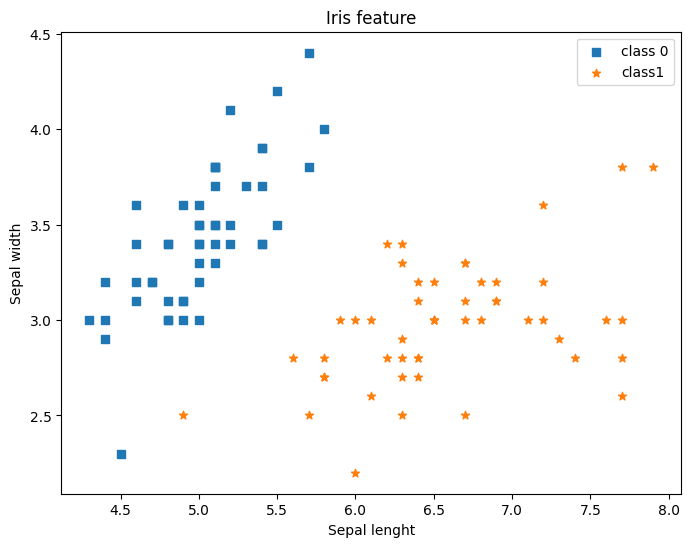

In [3]:
#3. Ploting data
plt.figure(1, figsize = (8,6))
plt.scatter(x[idx_0, 0], x[idx_0,1], marker='s') # type: ignore
plt.scatter(x[idx_1, 0], x[idx_1,1], marker='*') # type: ignore
plt.legend(['class 0', 'class1'])
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.title('Iris feature')


### Activation Function

$$y = 1 \; \; \;if \; \; \;x^T w \geq 0$$

$$y = 0 \; \; \;if \; \; \;x^T w < 0 $$

In [4]:
#4. Activation function h(x, w)

def h(x, w):
    xw = np.dot(x, w.T)
    z = 1 if xw >= 0 else 0
    return z


### Learning rule

$$
w = w + ex = w + (y - \tilde{y})x
$$

$$
\tilde{y} = h(x, w)
$$

### Decision Boundary

To plot the decision boundary we need to find a relationship between $x_2$ vs $x_1$, using the $w$ values. From the activation function $h(x^Tw)$:

$$x^T w = w_0 + w_1x_1 + w_2x_2$$

$$w_0 + w_1x_1 + w_2x_2 = 0$$

$$ x_2 = \frac{-w_0-w_1x_1}{w_2}$$

[[-62.   51.8 -76. ]]


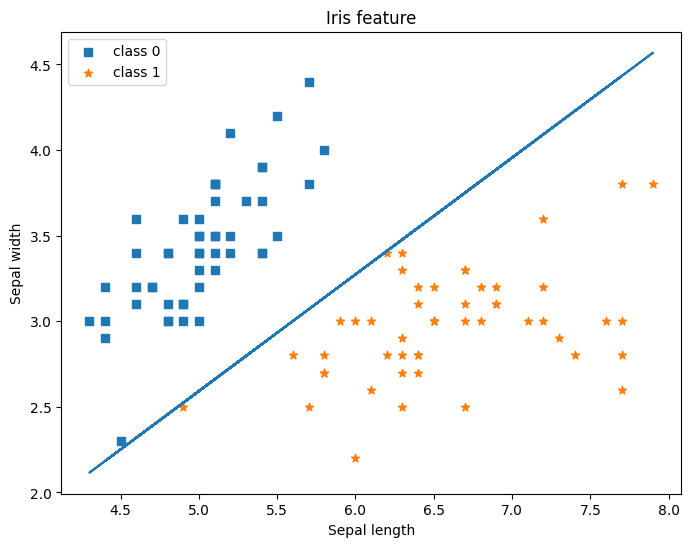

In [5]:
#5. Implement the perceptron here

#Agregar BIAS
m, n = x.shape
X = np.concatenate([np.ones((m, 1)), x], axis = 1)

#Intialize w
m, n = X.shape
w = np.zeros((1, n))

#Perceptron
flag = True

while flag:
    contar = 0
    for i in range(m):
        yt = h(X[i, :], w)
        w = w + (y[i] - yt) * X[i, :]
        if y[i] != yt:
            contar += 1
    if contar == 0:
        flag = False

plt.figure(1, figsize = (8,6))
plt.scatter(x[idx_0, 0], x[idx_0, 1], marker = 's') # type: ignore
plt.scatter(x[idx_1, 0], x[idx_1, 1], marker = '*') # type: ignore
plt.legend(['class 0', 'class 1'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris feature')
print(w)
# Decision boundary
db = (-w[0,0] - w[0,1] * X[: , 1]) / w[0, 2]
plt.plot(X[:, 1], db, '-')